In [10]:
# Find the direction of dataset
import numpy as np
import pandas as pd
import os
"""
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))"""

"\nfor dirname, _, filenames in os.walk('/kaggle/input'):\n    for filename in filenames:\n        print(os.path.join(dirname, filename))"

In [1]:
import cv2
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Conv2D, MaxPool2D, Flatten
from keras import optimizers
from keras import losses
from sklearn import metrics
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import random # for visualization
print('Libraries Imported')

Libraries Imported


In [2]:
#!unzip archive.zip

In [3]:
#import pictures from drive 
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!unzip -uq "/content/drive/My Drive/MIAS/archive.zip" -d "/content/drive/My Drive/MIAS"

In [5]:
path = '/content/drive/My Drive/MIAS/all-mias/'

In [11]:
print("reading dataframe")
info=pd.read_csv("/content/drive/My Drive/MIAS/Info.txt",sep=" ")
info=info.drop('Unnamed: 7',axis=1)

reading dataframe


In [12]:
info

,REFNUM,BG,CLASS,SEVERITY,X,Y,RADIUS
0,mdb001,G,CIRC,B,535.0,425.0,197.0
1,mdb002,G,CIRC,B,522.0,280.0,69.0
2,mdb003,D,NORM,NaN,NaN,NaN,NaN
3,mdb004,D,NORM,NaN,NaN,NaN,NaN
4,mdb005,F,CIRC,B,477.0,133.0,30.0
...,...,...,...,...,...,...,...
325,mdb318,D,NORM,NaN,NaN,NaN,NaN
326,mdb319,D,NORM,NaN,NaN,NaN,NaN
327,mdb320,D,NORM,NaN,NaN,NaN,NaN
328,mdb321,D,NORM,NaN,NaN,NaN,NaN


In [13]:
info.dropna(subset = ["SEVERITY"], inplace=True)

info.reset_index(inplace = True)
info

,index,REFNUM,BG,CLASS,SEVERITY,X,Y,RADIUS
0,0,mdb001,G,CIRC,B,535.0,425.0,197.0
1,1,mdb002,G,CIRC,B,522.0,280.0,69.0
2,4,mdb005,F,CIRC,B,477.0,133.0,30.0
3,5,mdb005,F,CIRC,B,500.0,168.0,26.0
4,10,mdb010,F,CIRC,B,525.0,425.0,33.0
...,...,...,...,...,...,...,...,...
118,281,mdb274,F,MISC,M,127.0,505.0,123.0
119,297,mdb290,D,CIRC,B,337.0,353.0,45.0
120,319,mdb312,F,MISC,B,240.0,263.0,20.0
121,321,mdb314,F,MISC,B,518.0,191.0,39.0


In [14]:
info = info.drop([3], axis=0)
info.reset_index(inplace = True)
info

,level_0,index,REFNUM,BG,CLASS,SEVERITY,X,Y,RADIUS
0,0,0,mdb001,G,CIRC,B,535.0,425.0,197.0
1,1,1,mdb002,G,CIRC,B,522.0,280.0,69.0
2,2,4,mdb005,F,CIRC,B,477.0,133.0,30.0
3,4,10,mdb010,F,CIRC,B,525.0,425.0,33.0
4,5,12,mdb012,F,CIRC,B,471.0,458.0,40.0
...,...,...,...,...,...,...,...,...,...
117,118,281,mdb274,F,MISC,M,127.0,505.0,123.0
118,119,297,mdb290,D,CIRC,B,337.0,353.0,45.0
119,120,319,mdb312,F,MISC,B,240.0,263.0,20.0
120,121,321,mdb314,F,MISC,B,518.0,191.0,39.0


In [15]:
# taking the images filenames in to dictionary
ids = {}
for i in range(len(info)):
    ids[i] = info.REFNUM[i]
#ids

In [16]:
# Turning our outputs B-M to 1-0
label = []
for i in range(len(info)):
    if info.SEVERITY[i] == 'B':
        label.append(1)
    else:
        label.append(0)

In [17]:
label = np.array(label)

In [18]:
label.shape

(122,)

In [19]:
# define the every images filepaths in to list
img_name = []

for i in range(len(label)):
        img_name.append(path + info.REFNUM[i]+ '.pgm')

In [20]:
img_name = np.array(img_name)
img_name

array(['/content/drive/My Drive/MIAS/all-mias/mdb001.pgm',
       '/content/drive/My Drive/MIAS/all-mias/mdb002.pgm',
       '/content/drive/My Drive/MIAS/all-mias/mdb005.pgm',
       '/content/drive/My Drive/MIAS/all-mias/mdb010.pgm',
       '/content/drive/My Drive/MIAS/all-mias/mdb012.pgm',
       '/content/drive/My Drive/MIAS/all-mias/mdb013.pgm',
       '/content/drive/My Drive/MIAS/all-mias/mdb015.pgm',
       '/content/drive/My Drive/MIAS/all-mias/mdb017.pgm',
       '/content/drive/My Drive/MIAS/all-mias/mdb019.pgm',
       '/content/drive/My Drive/MIAS/all-mias/mdb021.pgm',
       '/content/drive/My Drive/MIAS/all-mias/mdb023.pgm',
       '/content/drive/My Drive/MIAS/all-mias/mdb025.pgm',
       '/content/drive/My Drive/MIAS/all-mias/mdb028.pgm',
       '/content/drive/My Drive/MIAS/all-mias/mdb030.pgm',
       '/content/drive/My Drive/MIAS/all-mias/mdb032.pgm',
       '/content/drive/My Drive/MIAS/all-mias/mdb058.pgm',
       '/content/drive/My Drive/MIAS/all-mias/mdb059.pgm

In [21]:
#print(img_name)
print(f'image addres amount {img_name.shape}')

image addres amount (122,)


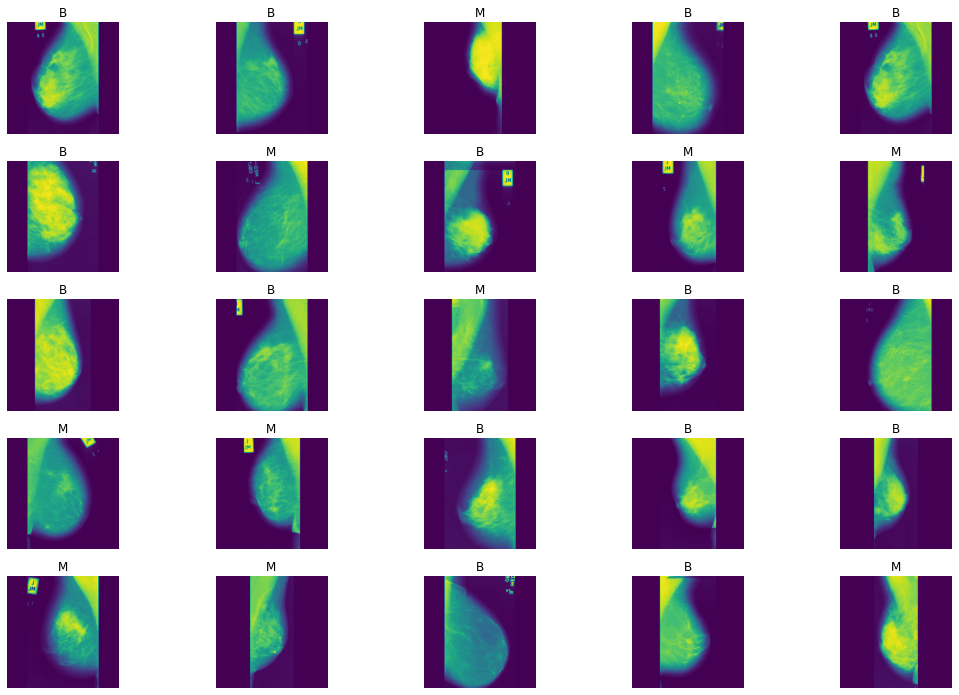

In [22]:
# view image random images
def view_25_random_image():
    fig = plt.figure(figsize = (15, 10))
    for i in range(25):
        rand = random.randint(0,len(label))
        ax = plt.subplot(5, 5, i+1)
    
        img = cv2.imread(img_name[rand], 0)
        img = cv2.resize(img, (256,256))
        if label[rand] == 1:
            plt.title('B')
        else:
            plt.title('M')
        plt.tight_layout()
        plt.axis('off')
        plt.imshow(img)
    fig.savefig('random_25_image_fig.png')

random_images = view_25_random_image()

In [23]:
img_path = []
last_label = []
for i in range(len(img_name)):
    
    img = cv2.imread(img_name[i], 0)
    img = cv2.resize(img, (224,224))
    rows, cols= img.shape
    for angle in range(360):
            M = cv2.getRotationMatrix2D((cols / 2, rows / 2), angle, 1)    #Rotate 0 degree
            img_rotated = cv2.warpAffine(img, M, (224, 224))
            img_path.append(img_rotated)
            if label[i] == 1:
                last_label.append(1)
            else:
                last_label.append(0)

In [24]:
last_label = np.array(last_label)
img_path = np.array(img_path)

In [25]:
# split train and test set
x_train, x_test, y_train, y_test = train_test_split(img_path, last_label, test_size = 0.2, random_state = 42)

In [26]:
len(x_train),len(x_test),len(y_train),len(y_test)

(35136, 8784, 35136, 8784)

In [27]:
x_train = np.array(x_train)
x_test = np.array(x_test)

In [28]:
x_train.shape

(35136, 224, 224)

In [29]:
x_test.shape

(8784, 224, 224)

In [30]:
(a,b,c)=x_train.shape # (35136, 224, 224)
x_train = np.reshape(x_train, (a, b, c, 1)) # 1 for gray scale
(a, b, c)=x_test.shape
x_test = np.reshape(x_test, (a, b, c, 1))

In [31]:

def create_model():
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(224, 224, 1)))
    model.add(Conv2D(64, kernel_size=(3,3),activation='relu'))
    model.add(MaxPool2D(pool_size=(2, 2)))

    model.add(Conv2D(64, kernel_size=(3,3),activation='relu'))
    model.add(MaxPool2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
  
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(1, activation='sigmoid'))
    return model

In [32]:
model = create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 64)      18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 54, 54, 64)        0         
_________________________________________________________________
dense (Dense)                (None, 54, 54, 64)        4

In [33]:

early_stop = EarlyStopping(monitor='val_loss', mode='min', patience=0,restore_best_weights=True, verbose=1)

check_point_filepath = './'

model_check_point = ModelCheckpoint(filepath =check_point_filepath, monitor='val_loss', verbose=1, save_best_only=True,
                                    save_weights_only=False, mode='auto', save_freq='epoch')

In [34]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

hist = model.fit(x_train,
                 y_train,
                 validation_split=0.2,
                 epochs=10,
                 batch_size=64,
                 callbacks=[early_stop, model_check_point])



Epoch 1/10
440/440 [==============================] - 126s 204ms/step - loss: 3.2267 - accuracy: 0.5346 - val_loss: 0.6660 - val_accuracy: 0.5805

Epoch 00001: val_loss improved from inf to 0.66595, saving model to ./
INFO:tensorflow:Assets written to: ./assets
Epoch 2/10
440/440 [==============================] - 89s 202ms/step - loss: 0.6167 - accuracy: 0.6499 - val_loss: 0.5415 - val_accuracy: 0.7291

Epoch 00002: val_loss improved from 0.66595 to 0.54152, saving model to ./
INFO:tensorflow:Assets written to: ./assets
Epoch 3/10
440/440 [==============================] - 90s 205ms/step - loss: 0.4996 - accuracy: 0.7529 - val_loss: 0.4245 - val_accuracy: 0.7998

Epoch 00003: val_loss improved from 0.54152 to 0.42450, saving model to ./
INFO:tensorflow:Assets written to: ./assets
Epoch 4/10
440/440 [==============================] - 90s 205ms/step - loss: 0.3618 - accuracy: 0.8410 - val_loss: 0.3271 - val_accuracy: 0.8635

Epoch 00004: val_loss improved from 0.42450 to 0.32707, saving

In [35]:
loss_value , accuracy = model.evaluate(x_test, y_test)

print('Test_loss_value = ' +str(loss_value))
print('test_accuracy = ' + str(accuracy))

print(model.predict(x_test))

275/275 [==============================] - 10s 34ms/step - loss: 0.1261 - accuracy: 0.9569
Test_loss_value = 0.12612389028072357
test_accuracy = 0.9568533897399902
[[0.09373371]
 [0.2820128 ]
 [0.0013128 ]
 ...
 [0.23267445]
 [0.98554486]
 [0.00401555]]


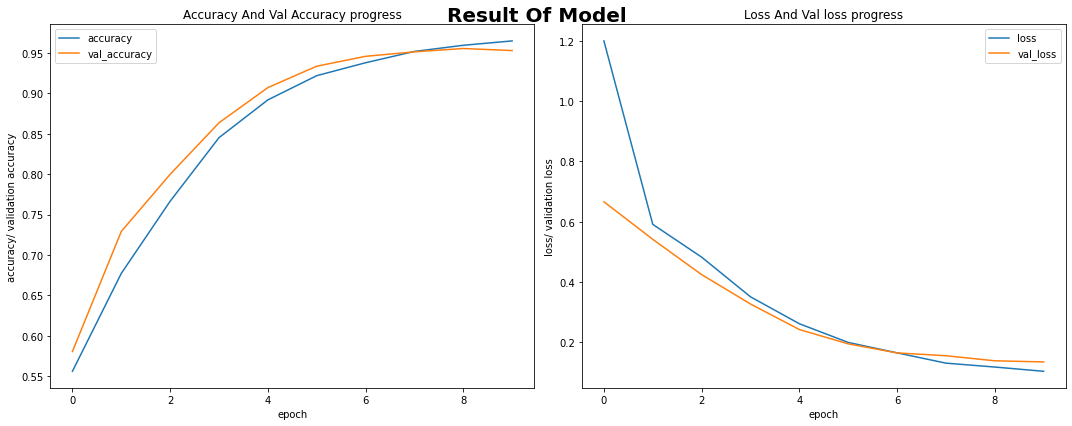

In [36]:

def Visualize_Result(acc,val_acc,loss, val_loss):
    fig, (ax1, ax2) = plt.subplots(nrows = 1,
                                   ncols = 2,
                                   figsize = (15,6),
                                   sharex =True)

    plot1 = ax1.plot(range(0, len(acc)),
                     acc,
                     label = 'accuracy')

    plot2 = ax1.plot(range(0, len(val_acc)),
                     val_acc,
                     label = 'val_accuracy')

    ax1.set(title = 'Accuracy And Val Accuracy progress',
            xlabel = 'epoch',
            ylabel = 'accuracy/ validation accuracy')

    ax1.legend()

    plot3 = ax2.plot(range(0, len(loss)),
                     loss,
                     label = 'loss')
    
    plot4 = ax2.plot(range(0, len(val_loss)),
                     val_loss,
                     label = 'val_loss')
    
    ax2.set(title = 'Loss And Val loss progress',
            xlabel = 'epoch',
            ylabel = 'loss/ validation loss')

    ax2.legend()

    fig.suptitle('Result Of Model', fontsize = 20, fontweight = 'bold')
    fig.savefig('Accuracy_Loss_figure.png')
    plt.tight_layout()
    plt.show()

visualize_result = Visualize_Result(hist.history['accuracy'],hist.history['val_accuracy'], hist.history['loss'], hist.history['val_loss'])

In [37]:
y_pred=model.predict(x_test)

In [38]:
y_pred.shape

(8784, 1)

In [39]:
y_pred

array([[0.09373371],
       [0.2820128 ],
       [0.0013128 ],
       ...,
       [0.23267445],
       [0.98554486],
       [0.00401555]], dtype=float32)

In [41]:
np.argmax(model.predict(x_test), axis=-1)

array([0, 0, 0, ..., 0, 0, 0])